## 1. SVD on linear regression (least square approximation)

The least squares solution $\tilde{x}$ for the linear regression problem can be expressed as:
$\tilde{x} = V^T \left( \Sigma^{-1} \right) U^T b$

Where:
- $\tilde{x}$ is the vector representing the coefficients of the regression line.
- $V^T$ is the transpose of the right singular matrix.
- $\Sigma^{-1}$ represents the inverse of the diagonal matrix $\Sigma$, obtained by taking the reciprocal of its non-zero elements.
- $U^T$ is the transpose of the left singular matrix.
- $b$ is the vector representing the noisy measurements.

This formula represents the mathematical expression of the least squares regression calculation using the singular value decomposition.

(The <a href='#ref1'>Derivation</a> of the formula has been put in the last section of this notebook.)

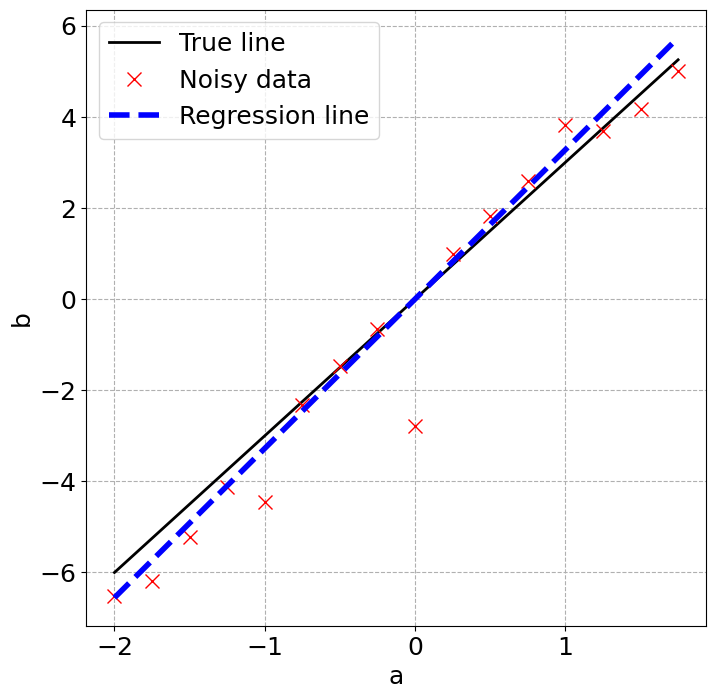

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
""" 
# In this problem, ax mimics as the predicted values, and b mimics as the observed values.
# a is a vector of y-coordinates, and x is the true slope.
# x is the vector of x-coordinates that we want to estimate.

Note that x = 3 is not our dataset. Instead, in the problem, (a_i , x_i * a_i) is our data points. 

"""
x = 3 # True slope

# In 2D plots scenario, we project y-coordinates to x-coordinates. So our A is just a 2x1 vector.
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a,'--',color='b',linewidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

Interestingly, we can apply the same line `atilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b` to obtain a fitting line to time series problems. 

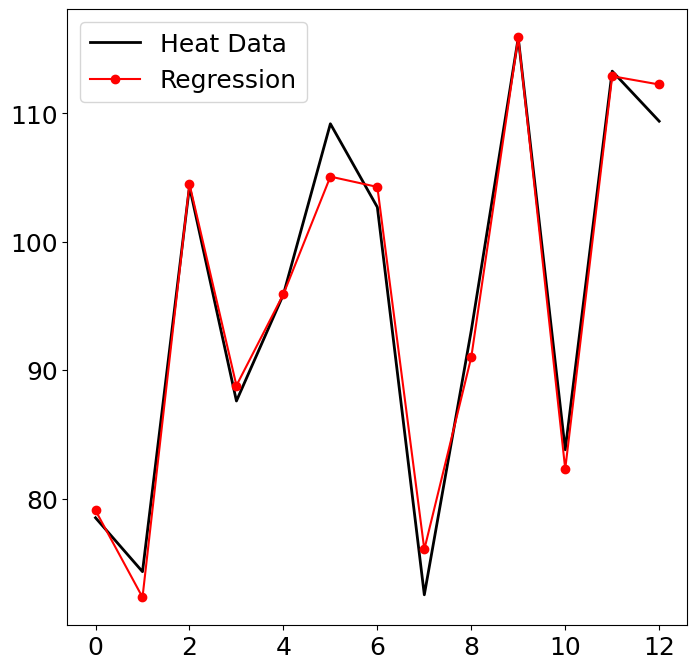

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
A = np.loadtxt(os.path.join('..','DATA','hald_ingredients.csv'),delimiter=',')
b = np.loadtxt(os.path.join('..','DATA','hald_heat.csv'),delimiter=',')

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='k', linewidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()

# Appendix: Deviations 

## Derivation for the $\tilde{x}$ used in linear regression problems <a id='ref1'></a>

Given the SVD of matrix $A$: $A = U \Sigma V^T$

Where:
- $A$ is the input data matrix,
- $U$ is the left singular matrix,
- $\Sigma$ is a diagonal matrix containing the singular values,
- $V^T$ is the transpose of the right singular matrix.

  

The linear regression problem can be formulated as finding coefficients $\mathbf{x}$ such that the residual sum of squares is minimized: $\underset{x}{argmin} \, \| A\mathbf{x} - \mathbf{b} \|_2^2$,
- where $Ax$ represents the predicted values (from linear regression model represented by $Ax$), and the actual observed values $b$.

Expanding this, we get:
$\| A\mathbf{x} - \mathbf{b} \|_2^2 = (A\mathbf{x} - \mathbf{b})^T (A\mathbf{x} - \mathbf{b})$
- In the context of the least squares problem, this dot product quantifies the squared Euclidean norm of the difference vector $Ax - b$.


Substituting $A = U \Sigma V^T$, we have:
$\| U \Sigma V^T \mathbf{x} - \mathbf{b} \|_2^2 = (U \Sigma V^T \mathbf{x} - \mathbf{b})^T (U \Sigma V^T \mathbf{x} - \mathbf{b})$


Since $U$ and $V^T$ are orthogonal matrices (i.e., $U^T U = I$ and $V^T V = I$), they do not affect the Euclidean norm. Therefore, we can simplify this expression to:

$\| \Sigma V^T \mathbf{x} - U^T \mathbf{b} \|_2^2 = (\Sigma V^T \mathbf{x} - U^T \mathbf{b})^T (\Sigma V^T \mathbf{x} - U^T \mathbf{b})$

Let $\mathbf{y} = V^T \mathbf{x}$. Then, the problem becomes $\underset{y}{\text{argmin}} \| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$

$\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2 = (\Sigma \mathbf{y} - U^T \mathbf{b})^T (\Sigma \mathbf{y} - U^T \mathbf{b})$

Expanding this expression, we have:

$\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2 = \sum_{i=1}^{n} (\sigma_i y_i - u_i^T \mathbf{b})^2$
where $\sigma_i$ are the singular values, and $u_i$ are the columns of $U$. The goal is to minimize this expression with respect to $\mathbf{y}$.

The solution to this problem is obtained by setting the derivative of $\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$ with respect to $\mathbf{y}$ to zero. Solving the resulting equations gives the optimal values for $\mathbf{y}$.

Finally, once $\mathbf{y}$ is obtained, we can find $\mathbf{x}$ using $\mathbf{x} = V \mathbf{y}$.

---
Transitions of `argmin` notation in the problem

- 1.  $\underset{x}{argmin} \, \| A\mathbf{x} - \mathbf{b} \|_2^2$ becomes $\underset{y}{argmin} \| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$ in the step of introducing $\mathbf{y} = V^T \mathbf{x}$.
- 2. In expanded form, we can also express our optimization problem as: $\underset{x_1, x_2, \ldots, x_n}{\text{argmin}} \, \sum_{i=1}^{m} (a_{i1}x_1 + a_{i2}x_2 + \ldots + a_{in}x_n - b_i)^2$ in the beginning, or $\underset{y_1, y_2, \ldots, y_n}{\text{argmin}} \sum_{i=1}^{n} (\sigma_i y_i - u_i^T \mathbf{b})^2$ at the end.

Now we have the following minimization problem:

$\underset{y}{\text{argmin}} \, \| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$

This can be expanded to:

$\underset{y}{\text{argmin}} \, \sum_{i=1}^{n} (\sigma_i y_i - u_i^T \mathbf{b})^2$

The solution to this problem is obtained by setting the derivative of $\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$ with respect to $\mathbf{y}$ to zero. The gradient of this function is:

$\frac{\partial}{\partial y} \| \Sigma y - U^T b \|_2^2 = 2 \Sigma^T (\Sigma y - U^T b)$

Setting this to zero gives:

$\Sigma^T (\Sigma y - U^T b) = 0$

Multiplying through by $\Sigma^{-T}$, remembering that $\Sigma$ is a diagonal matrix and so $\Sigma^T = \Sigma$ and $\Sigma^{-T} = \Sigma^{-1}$, yields:

$\Sigma y - U^T b = 0$

Then, solving for $y$ gives:

$\Sigma y = U^T b$

$y = \Sigma^{-1} U^T b$

Remember, we earlier defined $y = V^T x$, so we can substitute this back into the above equation to solve for $x$:

$V^T x = \Sigma^{-1} U^T b$

Finally, multiplying through by $V$ (since $V^T V = I$), we get:

$x = V \Sigma^{-1} U^T b$

So, the coefficients $\mathbf{x}$ that minimize the residual sum of squares in the original linear regression problem are given by this formula. Note that this assumes full rank of $A$ (so that $\Sigma^{-1}$ exists). In practice, the SVD is often used to calculate the pseudoinverse of $A$ for linear regression, which handles the case where $A$ is not full rank.

---

This derivation shows how the least squares solution in linear regression can be derived using Singular Value Decomposition. The formula $\tilde{x} = V^T \left( \Sigma^{-1} \right) U^T \mathbf{b}$ represents the optimal coefficients for the regression line.

So linear regression with SVD would be: $\tilde{x} = V^T \left( \Sigma^{-1} \right) U^T b$

## 2. QR decomposition

The expression `np.linalg.inv(R) @ Q.T @ b1` in the context of solving linear regression using QR decomposition represents the solution to the linear system $Ax = b$, where:

- $A$ is the matrix obtained from the QR decomposition of the input matrix `a`: $A = QR$.
- $x$ is the unknown vector that we aim to find.
- $b$ is the observed values vector.

The steps involved in this computation are:

1. $QRx = b$
2. Use $A = QR$ to rewrite the equation as $Ax = b$.
3. Use QR factorization to solve for $x$.

The equation can be represented as:
$$
x_{\text{tilde}} = R^{-1} Q^T b
$$

Where:
- $R^{-1}$ is the inverse of the upper triangular matrix $R$ obtained from the QR decomposition.
- $Q^T$ is the transpose of the orthogonal matrix $Q$ obtained from the QR decomposition.
- $b$ is the vector of observed values.

This equation represents the process of solving for $x_{\text{tilde}}$, the estimated coefficients for the linear regression model, using QR decomposition in the context of solving a linear system of equations.

## 3. Normal equations

Substituting $r =  b - Ax$ into $A^* r = 0$. Then we have $A^*(b - Ax) = 0$. This leads to the Normal Equation:
$$ A^*(Ax) = A^*b$$

And flipping the factor matrix to the right hand side of the equation, then we have: 
$$x = (A^TA)^{-1} A^T b$$

Least Squares SVD coefficient: 3.524541879646006
Least Squares SVD took 0.0 seconds
Least Squares QR coefficient: 3.524541879646006
Least Squares QR took 0.0 seconds
Least Squares Normal coefficient: 3.524541879646006
Least Squares Normal took 0.0 seconds


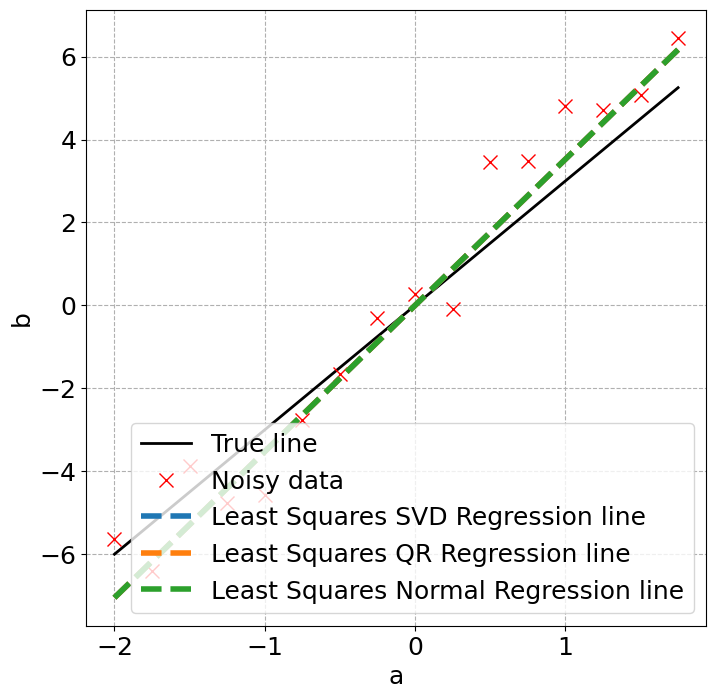

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import time

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# True slope
x = 3  

a = np.arange(-2, 2, 0.25).reshape(-1, 1)
b = x * a + np.random.randn(*a.shape)  # Add noise

plt.plot(a, x*a, color='k', linewidth=2, label='True line')  # True relationship
plt.plot(a, b, 'x', color='r', markersize=10, label='Noisy data')  # Noisy measurements

def least_squares_svd(a, b):
    U, s, Vt = np.linalg.svd(a, full_matrices=False)
    x = Vt.T @ np.linalg.inv(np.diag(s)) @ U.T @ b
    return x

def least_squares_qr(a, b):
    Q, R = np.linalg.qr(a)
    x = np.linalg.inv(R) @ Q.T @ b
    return x

def least_squares_normal(a, b):
    x = np.linalg.inv(a.T @ a) @ a.T @ b
    return x

methods = {
    'Least Squares SVD': least_squares_svd,
    'Least Squares QR': least_squares_qr,
    'Least Squares Normal': least_squares_normal
}

for name, method in methods.items():
    start_time = time.time()
    xtilde = method(a, b)
    elapsed_time = time.time() - start_time
    print(f"{name} coefficient: {xtilde[0][0]}")
    print(f"{name} took {elapsed_time} seconds")
    plt.plot(a, xtilde * a, '--', linewidth=4, label=f'{name} Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

## Compare stability

In [15]:
import numpy as np
import scipy.linalg as la

# Generate a random 500x500 matrix
A = np.random.rand(500, 500)

# Perform QR decomposition
Q, R = la.qr(A)

# Perform SVD decomposition
U, s, Vh = la.svd(A)

# Add a small perturbation to A
delta = np.random.rand(500, 500) * 1e-5
A_perturbed = A + delta

# Perform QR and SVD decomposition on the perturbed matrix
Q_p, R_p = la.qr(A_perturbed)
U_p, s_p, Vh_p = la.svd(A_perturbed)

# Measure the changes in the decompositions
qr_change = np.linalg.norm(Q - Q_p) + np.linalg.norm(R - R_p)
svd_change = np.linalg.norm(U - U_p) + np.linalg.norm(s - s_p) + np.linalg.norm(Vh - Vh_p)

print(f"Change in QR decomposition: {qr_change}")
print(f"Change in SVD decomposition: {svd_change}")

Change in QR decomposition: 0.0041514732761372295
Change in SVD decomposition: 4.002523280098892


## 3. `scipy.optimize.fmin()` package

For `scipy.optimize.fmin()` package, we define a cost function (mean squared error) and use `fmin()` to optimize this function to obtain the best coefficients. This approach treats linear regression as an optimization problem and iteratively adjusts the coefficients to minimize the specified cost function. 

While SVD method directly computes it, `fmin()` approach optimizes a specified cost function to find the coefficient. SVD-based linear regresson computes the coefficients by decomposing the design matrix into its singular value decomposition. It provides a direct and efficient way to solve the normal equations in linear regression. And it doesn not involve cost function iterations. 

In [1]:
import numpy as np

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# SVD-based Linear Regression
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_svd, residuals, _, _ = np.linalg.lstsq(X_b, y, rcond=None)
print("SVD-based Linear Regression Coefficients:", theta_svd.ravel())


SVD-based Linear Regression Coefficients: [4.22215108 2.96846751]


In [2]:
from scipy.optimize import fmin

# Define the cost function (mean squared error)
def mse_cost_function(theta, X, y):
    y_pred = X.dot(theta.reshape(-1, 1))
    return np.mean((y_pred - y) ** 2)

# Initial guess for the coefficients
initial_theta = np.zeros((2, 1))

# Optimize the cost function using scipy.optimize.fmin()
theta_optimized = fmin(mse_cost_function, x0=initial_theta, args=(X_b, y))

print("fmin() Optimized Linear Regression Coefficients:", theta_optimized)


Optimization terminated successfully.
         Current function value: 0.992439
         Iterations: 83
         Function evaluations: 159
fmin() Optimized Linear Regression Coefficients: [4.22215052 2.96845062]
